# Simulating redox flow batteries (RFBs)

## Imports required for quick start

In [1]:
from rfbzero.redox_flow_cell import ZeroDModel
from rfbzero.experiment import ConstantCurrent, ConstantCurrentConstantVoltage, ConstantVoltage

## 1. Flow cell setup

We'll first describe the redox flow cell and electrolytes to be cycled.

Flow cell design is configured via the [`ZeroDModel`](https://rfbzero.readthedocs.io/en/latest/flowcell.html#src.rfbzero.redox_flow_cell.ZeroDModel) class. Adjustable, RFB-specific, parameters include electrode active area, electrode geometric area, cell ohmic resistance, initial concentrations of redox-active species (oxidized and/or reduced), and
reservoir volumes of the capacity limiting side (CLS) and non-capacity limiting side (NCLS) electrolytes. A full description of all available parameters can be found in the [documentation](https://rfbzero.readthedocs.io/en/latest/flowcell.html). The user can also declare one of two electrolyte configurations for the RFB: 

1. **Full Cell**: different redox-active species in each reservoir and an OCV > 0 V. Species with the more negative reduction potential in the negative electrolyte (negolyte) and species with the more positive reduction potential in the positive electrolyte (posolyte).

2. **Symmetric Cell**: identical redox-actives in both reservoirs and a 0 V OCV when both reservoirs are at 50% state-of-charge (SOC).

Below, we define a cell with a 5 mL CLS, 10 mL NCLS, and 10 mM initial concentrations for all four species ($C_{ox,\scriptscriptstyle CLS},~C_{red,\scriptscriptstyle CLS},~C_{ox,\scriptscriptstyle NCLS},~C_{red,\scriptscriptstyle NCLS}$). The voltage difference between the formal reduction potential ($E^{o^{\prime}}$) of the posolyte and negolyte species is 1.0 V, defined as $E_{cell}^{o^{\prime}}=E_{\scriptscriptstyle posolyte}^{o^{\prime}}-E_{\scriptscriptstyle negolyte}^{o^{\prime}}$. 
A cell ohmic resistance of 1.0 $\Omega$, and electrochemical rate constants ($k_{o}$) of $10^{-3}$ cm/s for both posolyte and negolyte species, are also defined. The [`ZeroDModel`](https://rfbzero.readthedocs.io/en/latest/flowcell.html#src.rfbzero.redox_flow_cell.ZeroDModel) class defaults to one-electron transfers for redox-active species, but this can be changed as shown in the [documentation](https://rfbzero.readthedocs.io/en/latest/flowcell.html). Additionally, the simulation timestep `time_step` defaults to 0.01 seconds.

In [2]:
cell = ZeroDModel(
    volume_cls=0.005,   # liters
    volume_ncls=0.010,  # liters
    c_ox_cls=0.01,      # molar
    c_red_cls=0.01,     # molar
    c_ox_ncls=0.01,     # molar
    c_red_ncls=0.01,    # molar
    ocv_50_soc=1.0,     # volts
    resistance=1.0,     # ohms
    k_0_cls=1e-3,       # cm/sec
    k_0_ncls=1e-3,      # cm/sec
)

## 2. Select electrochemical cycling protocol

Cells can be electrochemically cycled by constant current (**CC**), constant current followed by constant voltage (**CCCV**), or constant voltage (**CV**) protocols. CC and CCCV cycling require user input of applied currents, while CCCV and CV cycling require input of current cutoffs for charge and discharge. All techniques require input of voltage limits for charge and discharge. If at any time during CCCV cycling the cell cannot provide the desired applied current, CV cycling will take place. The abstract base class for all cycling protocols is the [`CyclingProtocol`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.CyclingProtocol) class.

We define a CC protocol with the [`ConstantCurrent`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.ConstantCurrent) class to charge the flow cell up to 1.4 V and discharge down to 0.6 V, both at a current of 100 mA.

In [3]:
cc_protocol = ConstantCurrent(
    voltage_limit_charge=1.4,     # volts
    voltage_limit_discharge=0.6,  # volts
    current=0.1,                  # amps
)

## 3. Running the battery 

We then cycle the flow battery defined in [section 1](#1.-Flow-cell-setup), using the electrochemical cycling protocol defined in [section 2](#2.-Select-electrochemical-cycling-protocol), and simulate for 1000 seconds.

In [4]:
results = cc_protocol.run(
    cell_model=cell,
    duration=1000,    # seconds
)

1000 sec of cycling, time steps: 0.01 sec
Simulation stopped after 100000 time steps: time duration reached.


## 4a. Plot the cycling experiment with Matplotlib 
#### (or plotting package of your choice)

The `results` object is obtained from our simple RFB cycling simulation and is an instance of the [`CyclingResults`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.CyclingResults) class. This object has multiple temporal profiles of useful cell information such as voltage, current, capacities, concentrations, overpotentials, etc. Let's plot a few outputs describing the cell we just ran:

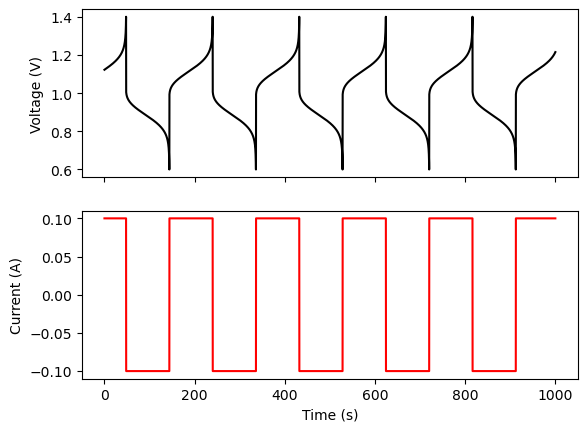

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(results.step_time, results.cell_v, color='k')
ax[1].plot(results.step_time, results.current, color='r')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Current (A)')
plt.show()

## 4b. Performing a CCCV experiment

We define a CCCV protocol with the [`ConstantCurrentConstantVoltage`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.ConstantCurrentConstantVoltage) class to charge an identical flow cell up to 1.2 V and discharge down to 0.8 V, at a current of $\pm$ 100 mA. We set the current cutoffs for the constant voltage holds to be $\pm$ 5 mA.

1000 sec of cycling, time steps: 0.01 sec
Simulation stopped after 100000 time steps: time duration reached.


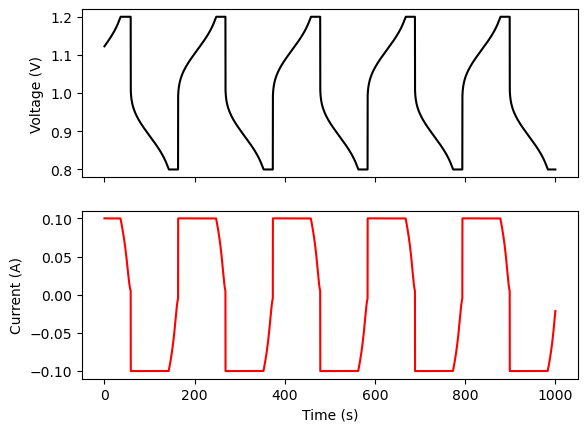

In [6]:
# 1. setup flow cell
cell = ZeroDModel(
    volume_cls=0.005,   # liters
    volume_ncls=0.010,  # liters
    c_ox_cls=0.01,      # molar
    c_red_cls=0.01,     # molar
    c_ox_ncls=0.01,     # molar
    c_red_ncls=0.01,    # molar
    ocv_50_soc=1.0,     # volts
    resistance=1.0,     # ohms
    k_0_cls=1e-3,       # cm/sec
    k_0_ncls=1e-3,      # cm/sec
)

# 2. declare cycling protocol
cccv_protocol = ConstantCurrentConstantVoltage(
    voltage_limit_charge=1.2,     # volts
    voltage_limit_discharge=0.8,  # volts
    current_cutoff=0.005,         # amps
    current=0.1,                  # amps
)

# 3. put it all together
results = cccv_protocol.run(cell_model=cell, duration=1000)

# plot voltage and current profiles for duration of simulation
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(results.step_time, results.cell_v, color='k')
ax[1].plot(results.step_time, results.current, color='r')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Current (A)')
plt.show()

## 4c. Performing a CV experiment

We define a CV protocol with the [`ConstantVoltage`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.ConstantVoltage) class to charge a flow cell up to 1.5 V and discharge down to 0.5 V, at constant voltage. We set the current cutoffs to be $\pm$ 5 mA.

1000 sec of cycling, time steps: 0.01 sec
Simulation stopped after 100000 time steps: time duration reached.


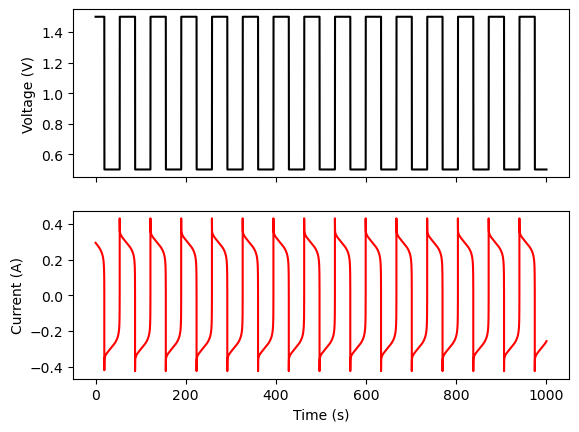

In [7]:
# 1. setup flow cell
cell = ZeroDModel(
    volume_cls=0.005,   # liters
    volume_ncls=0.010,  # liters
    c_ox_cls=0.01,      # molar
    c_red_cls=0.01,     # molar
    c_ox_ncls=0.01,     # molar
    c_red_ncls=0.01,    # molar
    ocv_50_soc=1.0,     # volts
    resistance=1.5,     # ohms
    k_0_cls=1e-3,       # cm/sec
    k_0_ncls=1e-3,      # cm/sec
)

# 2. declare cycling protocol
cv_protocol = ConstantVoltage(
    voltage_limit_charge=1.5,     # volts
    voltage_limit_discharge=0.5,  # volts
    current_cutoff=0.005,         # amps
)

# 3. put it all together
results = cv_protocol.run(cell_model=cell, duration=1000)

# plot voltage and current profiles for duration of simulation
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(results.step_time, results.cell_v, color='k')
ax[1].plot(results.step_time, results.current, color='r')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Current (A)')
plt.show()

**In summary**, the general simulation procedure is as follows: 

1. Describe flow cell with the [`ZeroDModel`](https://rfbzero.readthedocs.io/en/latest/flowcell.html#src.rfbzero.redox_flow_cell.ZeroDModel) class.
2. Select the electrochemical cycling protocol class i.e., [`ConstantCurrent`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.ConstantCurrent), [`ConstantCurrentConstantVoltage`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.ConstantCurrentConstantVoltage), or [`ConstantVoltage`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.ConstantVoltage).
3. Simulate the cell for some duration by calling the [`run`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.CyclingProtocol.run) function of the cycling protocol class.


# Theory behind `RFBzero`

For full derivation of a zero-dimensional flow battery model, see Modak & Kwabi [1].

[1] Modak, S. & Kwabi, D.G. A Zero-Dimensional Model for Electrochemical Behavior and Capacity Retention in Organic Flow Cells. Journal of the Electrochemical Society 168, 080528 (2021) [DOI: 10.1149/1945-7111/ac1c1f](https://doi.org/10.1149/1945-7111/ac1c1f).

<br>
<br>

The zero-dimensional model attempts to simulate the underlying electrochemical processes in an RFB by incrementing through cycling time at small finite time steps. At each time step iteration ($\Delta t$) in the zero-dimensional model, the concentrations of reduced ($C_{red}$) and oxidized ($C_{ox}$) species in both the CLS and NCLS are updated via Coulomb counting:

<br>
\begin{equation}
C_{\xi,t} = C_{\xi,t-1} \pm \frac{i\Delta t}{n_{\theta} F v_{\theta}}, 
\label{eq:coulomb} \tag{1}
\end{equation}
<br>

where $\xi=$ red or ox, $\theta=$ CLS or NCLS, $n=$ electrons transferred per half reaction, $i=$ current, $F=$ Faraday constant, and $v=$ reservoir volume.

Addition/subtraction of the second term depends on the redox species, whether the cell is charging or discharging, and if the CLS is the negolyte or posolyte. [`ZeroDModel`](https://rfbzero.readthedocs.io/en/latest/flowcell.html#src.rfbzero.redox_flow_cell.ZeroDModel) defaults to $\Delta t=0.01~s$, where in the limit of increasingly small time steps the simulation perfectly models the described equations. The model is deterministic, but as with any finite element discretization, there is a trade-off between simulation accuracy and computational speed. We don't recommend using time steps greater than 1 second.
<br>
<br>

The updated redox-active species concentrations are then used to calculate the open-circuit voltage ($OCV$) via the Nernst equation for the entire cell:

<br>
\begin{equation}
OCV = E_{cell}^{o^{\prime}}  \pm  \left [ \frac{RT}{n_{\scriptscriptstyle CLS}F}\ln \left (\frac{C_{red, \scriptscriptstyle CLS}}{C_{ox, \scriptscriptstyle CLS}} \right)
+
\frac{RT}{n_{\scriptscriptstyle NCLS}F}\ln \left (\frac{C_{ox, \scriptscriptstyle NCLS}}{C_{red, \scriptscriptstyle NCLS}} \right)
\right]
\label{eq:nernst} \tag{2}
\end{equation}
<br>

where the bracketed term in \eqref{eq:nernst} is added to $E_{cell}^{o^{\prime}}$ if the CLS is the negolyte, or subtracted if the CLS is the posolyte, as defined by the user in [section 1.](#1.-Flow-cell-setup)

Species concentrations and cell current ($i$) are then used to determine the ohmic ($\eta_{ohm}$), activation ($\eta_{act}$), and mass transport ($\eta_{MT}$) overpotentials for both the CLS and NCLS:

<br>
\begin{equation}
\eta_{ohm} = i \cdot R_{\Omega}
\label{eq:n_ohmic} \tag{3}
\end{equation}

<br>

\begin{equation}
\begin{split}
\eta_{act} & =\eta_{act, \scriptscriptstyle CLS} + \eta_{act, \scriptscriptstyle NCLS} \\
& = \frac{RT}{n_{\scriptscriptstyle CLS}F}\ln \left [ \frac{\left | i \right |}{2i_{o,\scriptscriptstyle CLS}} + \sqrt{\left ( \frac{i}{2i_{o, \scriptscriptstyle CLS}} \right )^{2} + 1 }\hspace{0.2em} \right ] \\
&  +
\frac{RT}{n_{\scriptscriptstyle NCLS}F}\ln \left [ \frac{\left | i \right |}{2i_{o,\scriptscriptstyle NCLS}} + \sqrt{\left ( \frac{i}{2i_{o, \scriptscriptstyle NCLS}} \right )^{2} + 1 }\hspace{0.2em} \right ]
\end{split}
\label{eq:n_activation} \tag{4}
\end{equation}
<br>

where the exchange current ($i_o$) is calculated as follows:

<br>
\begin{equation}
i_{o,\theta}= n_{\theta} F R_{f} A_{geo} k_{o,\theta} (C_{red,\theta})^{\alpha_{\theta}} (C_{ox,\theta})^{1-\alpha_{\theta}},
\label{eq:exchange_i} \tag{5}
\end{equation}
<br>

where $R_f=$ roughness factor ($\mathrm{cm_{active}^2 / cm_{geo}^2)}$, $A_{geo}=$ geometric surface area, $k_{o,\theta} =$ electrochemical rate constant of species in CLS or NCLS, and $\alpha_{\theta}=$ transfer coefficient of species in CLS or NCLS.
<br>
<br>

The mass transport overpotential during charging (where CLS is the negolyte) is calculated as follows:

\begin{equation}
\begin{split}
\eta_{\scriptscriptstyle MT} & = \eta_{\scriptscriptstyle MT, CLS} + \eta_{\scriptscriptstyle MT, NCLS} \\
& = -\left ( \frac{RT}{n_{\scriptscriptstyle CLS}F}\ln \left [1- \frac{C_{tot,\scriptscriptstyle CLS}i}{C_{ox,\scriptscriptstyle CLS}i_{lim,\scriptscriptstyle CLS} + C_{red,\scriptscriptstyle CLS}i} \right ] \right. \\
& + \left. \frac{RT}{n_{\scriptscriptstyle NCLS}F}\ln \left [1- \frac{C_{tot,\scriptscriptstyle NCLS}i}{C_{red,\scriptscriptstyle NCLS}i_{lim,\scriptscriptstyle NCLS} + C_{ox,\scriptscriptstyle NCLS}i} \right ] \right )
\end{split}
\label{eq:n_masstransport} \tag{6}
\end{equation}
<br>
<br>

which requires calculation of limiting currents:

<br>
\begin{equation}
i_{lim,\theta} = n_{\theta} F k_{\scriptscriptstyle MT} C_{lim,\theta} A_{geo},
\label{eq:lim_i} \tag{7}
\end{equation}
<br>

where $k_{MT}=$ mass transport coefficient (cm/s), and $C_{lim,\theta}= C_{red,\theta}~(C_{ox,\theta})$ when a reservoir is being oxidized (reduced). 


Note that on discharging, $C_{red,\theta}$ and $C_{ox,\theta}$ labels are switched in \eqref{eq:n_masstransport}.


<br>
<br>

**Finally**, summing OCV \eqref{eq:nernst} and overpotentials \eqref{eq:n_ohmic}, \eqref{eq:n_activation}, \eqref{eq:n_masstransport} yields the cell voltage:

<br>
\begin{equation}
V_{cell} = OCV + \eta_{ohm} + \eta_{act} + \eta_{MT}
\label{eq:v_cell} \tag{8}
\end{equation}
<br>

In a constant current mode, cell voltage is updated at each time step according to the above equations. In a constant voltage mode, cell voltage is defined by the user and the cell current for the next time step is determined by a solver that ensures $V_{cell} - OCV - \eta_{total}=0$.


# Degradation mechanisms (optional)

Optional capacity fade mechanisms can also be incorporated. These include chemical degradation, chemical redox of active species (e.g. self-discharge), dimerization, or multiple stacked degradation mechanisms. Rate constants and reaction rate orders can be adapted as needed to the electrolyte chemistries in each reservoir. 
<br>

A mechanism class is first declared, and then passed to a cycling protocol's [`run`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.CyclingProtocol.run) method. The same mechanism can be applied to both CLS and NCLS via `.run(degradation=...)` (standard for a symmetric cell), or individual reservoirs can be selected for degradation mechanisms, e.g., `.run(cls_degradation=..., ncls_degradation=...)`. The abstract base class for all degradations is the [`DegradationMechanism`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.DegradationMechanism) class.
<br>
Currently available degradation mechanism classes:

## a. Chemical degradation, oxidized species
The [`ChemicalDegradationOxidized`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.ChemicalDegradationOxidized) class provides an $\mathrm{n^{th}}$ order chemical degradation of the oxidized species ($C_{ox}$) of interest, with rate constant $k_n$:


<br>
\begin{equation}
\frac{d[C_{ox}]}{dt} = -k_n [C_{ox}]^{n}
\label{eq:chemdeg_ox} \tag{9}
\end{equation}
<br>

## b. Chemical degradation, reduced species
The [`ChemicalDegradationReduced`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.ChemicalDegradationReduced) class provides an $\mathrm{n^{th}}$ order chemical degradation of the reduced species ($C_{red}$) of interest, with rate constant $k_n$:


<br>
\begin{equation}
\frac{d[C_{red}]}{dt} = -k_n [C_{red}]^{n}
\label{eq:chemdeg_red} \tag{10}
\end{equation}
<br>

## c. Auto-oxidation (self-discharge)
The [`AutoOxidation`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.AutoOxidation) class provides a $\mathrm{1^{st}}$ order chemical oxidation of $C_{red}\rightarrow C_{ox}$ (no active material is destroyed), with rate constant $k_1$:


<br>
\begin{equation}
\frac{d[red]}{dt} = -\frac{d[ox]}{dt} = -k_1 [red]
\label{eq:auto-ox} \tag{11}
\end{equation}
<br>

## d. Auto-reduction (self-discharge)
The [`AutoReduction`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.AutoReduction) class provides a $\mathrm{1^{st}}$ order chemical reduction of $C_{ox}\rightarrow C_{red}$ (no active material is destroyed), with rate constant $k_1$:


<br>
\begin{equation}
\frac{d[ox]}{dt} = -\frac{d[red]}{dt} = -k_1 [ox]
\label{eq:auto-red} \tag{12}
\end{equation}
<br>

## e. Dimerization
The [`Dimerization`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.Dimerization) class provides a reversible chemical dimerization of $C_{ox} + C_{red} \leftrightarrow C_{dimer}$, dictated by the dimerization equilibrium constant ($K_{dimer}$):

<br>
\begin{equation}
K_{dimer} = \frac{k_{forward}}{k_{backward}}
\label{eq:k_dimer} \tag{13}
\end{equation}
<br>

<br>
\begin{equation}
\frac{d[dimer]}{dt} = -\frac{d[ox]}{dt} = -\frac{d[red]}{dt} = k_f [ox] [red] - k_b [dimer]
\label{eq:dimer} \tag{14}
\end{equation}
<br>

## f. Multiple mechanisms
The [`MultiDegradationMechanism`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.MultiDegradationMechanism) class provides the option to input multiple degradation mechanisms, and allows for different and/or multiple mechanisms to be applied to reduced and/or oxidized species. Degradation mechanisms are applied in the same order they are inputted, which only matters computationally at large time steps where accuracy is decreased.

# Degradation Examples

## Full cell, CCCV, chemical degradation of reduced species in CLS and NCLS

Half-cycle capacities can be accessed via the `charge_cycle_capacity` and `discharge_cycle_capacity` data from the simulation results container obtained from the [`CyclingResults`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.CyclingResults) class. Likewise, the cycle time of those cycles can be accessed via `charge_cycle_time` and `discharge_cycle_time`.

1000 sec of cycling, time steps: 0.01 sec
Simulation stopped after 100000 time steps: time duration reached.


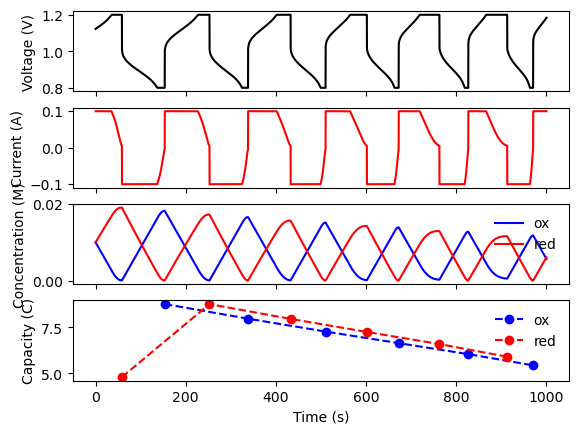

In [8]:
from rfbzero.degradation import ChemicalDegradationReduced

# 1. setup flow cell
cell = ZeroDModel(
    volume_cls=0.005,   # liters
    volume_ncls=0.010,  # liters
    c_ox_cls=0.01,      # molar
    c_red_cls=0.01,     # molar
    c_ox_ncls=0.01,     # molar
    c_red_ncls=0.01,    # molar
    ocv_50_soc=1.0,     # volts
    resistance=1.0,     # ohms
    k_0_cls=1e-3,       # cm/sec
    k_0_ncls=1e-3,      # cm/sec
)

# 2. declare cycling protocol
cccv_protocol = ConstantCurrentConstantVoltage(
    voltage_limit_charge=1.2,     # volts
    voltage_limit_discharge=0.8,  # volts
    current_cutoff=0.005,         # amps
    current=0.1,                  # amps
)

# 3. declare degradation mechanism
chem_deg = ChemicalDegradationReduced(
    rate_order=1,        # declares a first order mechanism
    rate_constant=1e-3,  # first order rate constant, 1/sec
)

# 4. put it all together
results = cccv_protocol.run(
    cell_model=cell,
    degradation=chem_deg,  # include degradation mechanism
    duration=1000
)

# plot voltage, current, and concentration profiles for duration of simulation
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
sim_time = results.step_time
ax[0].plot(sim_time, results.cell_v, color='k')
ax[1].plot(sim_time, results.current, color='r')
ax[2].plot(sim_time, results.c_ox_cls, color='b', label='ox')
ax[2].plot(sim_time, results.c_red_cls, color='r', label='red')
ax[3].plot(results.discharge_cycle_time, results.discharge_cycle_capacity, 'bo--', label='ox')
ax[3].plot(results.charge_cycle_time, results.charge_cycle_capacity, 'ro--', label='red')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_ylabel('Current (A)')
ax[2].set_ylabel('Concentration (M)')
ax[2].legend(frameon=False)
ax[3].set_ylabel('Capacity (C)')
ax[3].legend(frameon=False)
ax[3].set_xlabel('Time (s)')
plt.show()

## Full cell, CV, autoreduction in CLS, and chemical degradation of oxidized species (2nd order) in NCLS

1000 sec of cycling, time steps: 0.01 sec
Simulation stopped after 100000 time steps: time duration reached.


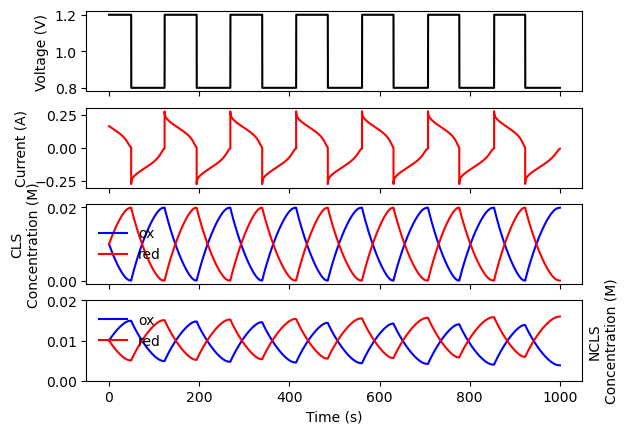

In [9]:
from rfbzero.degradation import AutoReduction, ChemicalDegradationOxidized

# 1. setup flow cell
cell = ZeroDModel(
    volume_cls=0.005,   # liters
    volume_ncls=0.010,  # liters
    c_ox_cls=0.01,      # molar
    c_red_cls=0.01,     # molar
    c_ox_ncls=0.01,     # molar
    c_red_ncls=0.01,    # molar
    ocv_50_soc=1.0,     # volts
    resistance=1.0,     # ohms
    k_0_cls=1e-3,       # cm/sec
    k_0_ncls=1e-3,      # cm/sec
)

# 2. declare cycling protocol
cv_protocol = ConstantVoltage(
    voltage_limit_charge=1.2,     # volts
    voltage_limit_discharge=0.8,  # volts
    current_cutoff=0.005,         # amps
)

# 3. declare CLS degradation mechanism
auto_red_cls = AutoReduction(rate_constant=2e-4)

# 4. declare NCLS degradation mechanism
chem_deg_ncls = ChemicalDegradationOxidized(
    rate_order=2,        # declares a second order mechanism
    rate_constant=2e-3,  # second order rate constant, 1/(M*sec)
)

# 5. put it all together
results = cv_protocol.run(
    cell_model=cell,
    cls_degradation=auto_red_cls,    # include CLS degradation mechanism
    ncls_degradation=chem_deg_ncls,  # include NCLS degradation mechanism
    duration=1000
)

# plot voltage, current, and concentration profiles for duration of simulation
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
sim_time = results.step_time
ax[0].plot(sim_time, results.cell_v, color='k')
ax[1].plot(sim_time, results.current, color='r')
ax[2].plot(sim_time, results.c_ox_cls, color='b', label='ox')
ax[2].plot(sim_time, results.c_red_cls, color='r', label='red')
ax[3].plot(sim_time, results.c_ox_ncls, color='b', label='ox')
ax[3].plot(sim_time, results.c_red_ncls, color='r', label='red')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_ylabel('Current (A)')
ax[2].set_ylabel('CLS\nConcentration (M)')
ax[2].legend(frameon=False)
ax[3].set_ylabel('NCLS\nConcentration (M)')
ax[3].yaxis.set_label_position("right")
ax[3].set_ylim([0,0.02])
ax[3].set_xlabel('Time (s)')
ax[3].legend(frameon=False)
plt.show()

# Crossover of redox-actives (optional)

Crossover of redox-active species through the ion-exchange membrane, driven by concentration gradients, can also be included in simulations. Permeabilities of oxidized and reduced species, and membrane thickness, can be set by the user via the [`Crossover`](https://rfbzero.readthedocs.io/en/latest/crossover.html#src.rfbzero.crossover.Crossover) class. Currently, crossover of active species is only available for a symmetric cell, as it is indistinguishable from a first order degradation mechanism in a single reservoir of a full cell, when no interactions between crossing posolyte/negolyte species are taken into consideration. Furthermore, current-driven crossover cannot currently be simulated in `rfbzero.py`. Crossover of redox-active species is defined as follows:

<br>
\begin{equation}
\frac{d[ox]_\theta}{dt} = \pm \frac{\Lambda P_{ox} (C_{ox,\scriptscriptstyle CLS} - C_{ox,\scriptscriptstyle NCLS})}{v_{\theta}},
\label{eq:perm_ox} \tag{15}
\end{equation}
<br>
<br>

<br>
\begin{equation}
\frac{d[red]_\theta}{dt} = \pm \frac{\Lambda P_{red} (C_{red,\scriptscriptstyle CLS} - C_{red,\scriptscriptstyle NCLS})}{v_{\theta}},
\label{eq:perm_red} \tag{16}
\end{equation}
<br>
<br>
<br>

where $\theta=\mathrm{CLS~or~NCLS}$, and membrane constant $\Lambda = \frac{A_{geo}}{\mathrm{membrane~thickness}}$
<br>
<br>


## Example: Symmetric cell with crossover, where $P_{ox} \neq P_{red}$. Chemical degradation of reduced species

We define a CCCV protocol with the [`ConstantCurrentConstantVoltage`](https://rfbzero.readthedocs.io/en/latest/experiment.html#src.rfbzero.experiment.ConstantCurrentConstantVoltage) class for a **symmetric cell**, to charge up to 0.2 V and discharge down to -0.2 V, at $\pm$ 100 mA. We set the current cutoffs to be $\pm$ 5 mA.\
We now include a crossover mechanism via the [`Crossover`](https://rfbzero.readthedocs.io/en/latest/crossover.html#src.rfbzero.crossover.Crossover) class, with a membrane thickness of $\mathrm{50~\mu m}$, and permeabilities for oxidized and reduced species: $P_{ox}=1\times10^{-7}~cm^{2}/s~,~P_{red}=5\times10^{-7}~cm^{2}/s$.

The amount of species, in mols, that is crossing the membrane at each timestep (right hand side of **(15)** or **(16)**, multiplied by timestep) is given by the `crossed_ox_mols` and `crossed_red_mols` data from the simulation results container. A positive `crossed_..._mols` means that species are crossing from CLS to NCLS.

1000 sec of cycling, time steps: 0.01 sec
Simulation stopped after 100000 time steps: time duration reached.


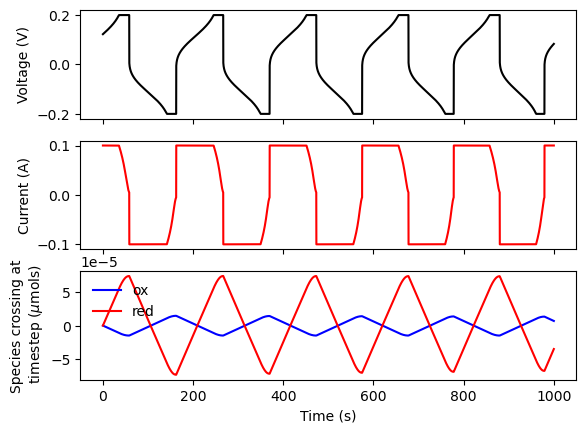

In [10]:
from rfbzero.crossover import Crossover

# 1. setup flow cell
cell = ZeroDModel(
    volume_cls=0.005,   # liters
    volume_ncls=0.010,  # liters
    c_ox_cls=0.01,      # molar
    c_red_cls=0.01,     # molar
    c_ox_ncls=0.01,     # molar
    c_red_ncls=0.01,    # molar
    ocv_50_soc=0.0,     # volts
    resistance=1.0,     # ohms
    k_0_cls=1e-3,       # cm/sec
    k_0_ncls=1e-3,      # cm/sec
)

# 2. declare cycling protocol
cccv_protocol = ConstantCurrentConstantVoltage(
    voltage_limit_charge=0.2,      # volts
    voltage_limit_discharge=-0.2,  # volts
    current_cutoff=0.005,          # amps
    current=0.1,                   # amps
)

# 3. declare degradation mechanism
chem_deg = ChemicalDegradationReduced(rate_order=1, rate_constant=1e-4)

# 4. declare crossover mechanism
cross = Crossover(
    membrane_thickness=50,  # microns
    permeability_ox=1e-7,   # cm^2/sec
    permeability_red=5e-7,  # cm^2/sec
)

# 5. put it all together
results = cccv_protocol.run(
    cell_model=cell,
    degradation=chem_deg,  # include degradation mechanism
    crossover=cross,       # include crossover mechanism
    duration=1000, 
)

# plot voltage, current, and concentration profiles for duration of simulation
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
sim_time = results.step_time
ax[0].plot(sim_time, results.cell_v, color='k')
ax[1].plot(sim_time, results.current, color='r')
ax[2].plot(sim_time, [i*1e6 for i in results.crossed_ox_mols], color='b', label='ox')
ax[2].plot(sim_time, [i*1e6 for i in results.crossed_red_mols], color='r', label='red')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_ylabel('Current (A)')
ax[2].set_ylabel('Species crossing at\n timestep ($\mu$mols)')
ax[2].set_xlabel('Time (s)')
ax[2].legend(frameon=False)
plt.show()

# Advanced options
<br>


## Asymmetric currents, current limits

Applied currents during charge/discharge CC cycling of CC and CCCV protocols are identical (in absolute value) by default, via the `current` parameter of the chosen electrochemical cycling protocol. This is also the case for current cutoffs during the voltage hold of CCCV and CV cycling, via the `current_cutoff` parameter of the cycling protocol. However, asymmetric values can be used instead. In place of `current`, the user can declare a positive value for `current_charge` and a negative value for `current_discharge`. Likewise, `current_cutoff_charge` and `current_cutoff_discharge` can replace the use of `current_cutoff`.

Below, we define a **symmetric cell** with a CCCV protocol to charge at 100 mA up to 0.2 V and discharge at -50 mA down to -0.2 V. The voltage hold during charging has a current cutoff of 5 mA, while the voltage hold during discharging has a current cutoff of 20 mA.

1000 sec of cycling, time steps: 0.01 sec
Simulation stopped after 100000 time steps: time duration reached.


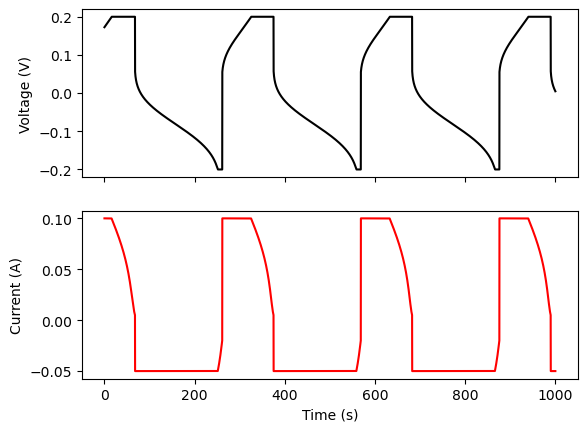

In [11]:
# 1. setup flow cell
cell = ZeroDModel(
    volume_cls=0.005,   # liters
    volume_ncls=0.010,  # liters
    c_ox_cls=0.01,      # molar
    c_red_cls=0.01,     # molar
    c_ox_ncls=0.01,     # molar
    c_red_ncls=0.01,    # molar
    ocv_50_soc=0.0,     # volts
    resistance=1.5,     # ohms
    k_0_cls=1e-3,       # cm/sec
    k_0_ncls=1e-3,      # cm/sec
)

# 2. declare cycling protocol
cccv_protocol = ConstantCurrentConstantVoltage(
    voltage_limit_charge=0.2,         # volts
    voltage_limit_discharge=-0.2,     # volts
    current_charge=0.1,               # amps
    current_discharge=-0.05,          # amps
    current_cutoff_charge=0.005,      # amps
    current_cutoff_discharge=-0.020,  # amps
)

# 3. put it all together
results = cccv_protocol.run(cell_model=cell, duration=1000)

# plot voltage, current, and concentration profiles for duration of simulation
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
sim_time = results.step_time
ax[0].plot(sim_time, results.cell_v, color='k')
ax[1].plot(sim_time, results.current, color='r')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_ylabel('Current (A)')
ax[1].set_xlabel('Time (s)')
plt.show()

## Example: The *everything* battery

Putting everything together, we simulate a **Full cell** for 2000 seconds with the following characteristics:

1. CCCV protocol 
    - Charge @100 mA up to 1.2 V, with 5 mA current cutoff during voltage hold.
    - Discharge @-50 mA down to 0.8 V, with -10 mA current cutoff during voltage hold.
2. CLS has a [`MultiDegradationMechanism`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.MultiDegradationMechanism) consisting of two mechanisms:
    - A $\mathrm{1^{st}}$ order [`ChemicalDegradationReduced`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.ChemicalDegradationReduced) mechanism.
    - An [`AutoReduction`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.AutoReduction) mechanism (chemical reduction of oxidized species).
3. NCLS has a $\mathrm{2^{nd}}$ order [`ChemicalDegradationOxidized`](https://rfbzero.readthedocs.io/en/latest/degradation.html#src.rfbzero.degradation.ChemicalDegradationOxidized) mechanism.
4. Asymmetric charge/discharge currents and current cutoffs.

2000 sec of cycling, time steps: 0.01 sec
Simulation stopped after 200000 time steps: time duration reached.


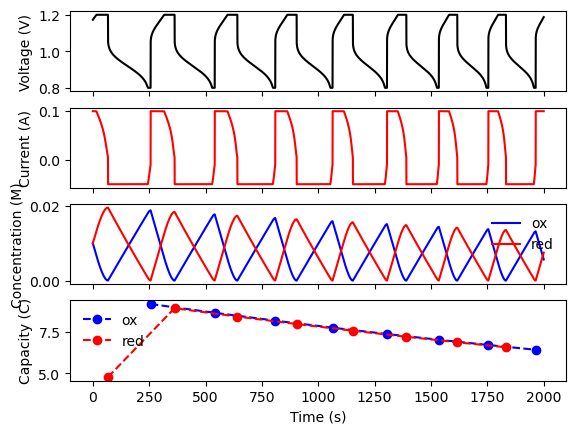

In [12]:
from rfbzero.degradation import MultiDegradationMechanism

# 1. setup flow cell
cell = ZeroDModel(
    volume_cls=0.005,   # liters
    volume_ncls=0.010,  # liters
    c_ox_cls=0.01,      # molar
    c_red_cls=0.01,     # molar
    c_ox_ncls=0.01,     # molar
    c_red_ncls=0.01,    # molar
    ocv_50_soc=1.0,     # volts
    resistance=1.5,     # ohms
    k_0_cls=1e-3,       # cm/sec
    k_0_ncls=1e-3,      # cm/sec
)

# 2. declare cycling protocol
cccv_protocol = ConstantCurrentConstantVoltage(
    voltage_limit_charge=1.2,         # volts
    voltage_limit_discharge=0.8,      # volts
    current_charge=0.1,               # amps
    current_discharge=-0.05,           # amps
    current_cutoff_charge=0.005,      # amps
    current_cutoff_discharge=-0.010,  # amps
)

# 3a. declare CLS degradation mechanism
chem_deg_cls = ChemicalDegradationReduced(rate_order=1, rate_constant=4e-4)

# 3b. declare another CLS degradation mechanism
auto_red_cls = AutoReduction(rate_constant=2e-4)

# 3c. combine both CLS mechanisms into a stacked MultiDegradationMechanism
cls_deg = MultiDegradationMechanism([chem_deg_cls, auto_red_cls])

# 4. declare NCLS degradation mechanism
chem_deg_ncls = ChemicalDegradationOxidized(rate_order=2, rate_constant=3e-4)

# 5. put it all together
results = cccv_protocol.run(
    cell_model=cell,
    cls_degradation=cls_deg,         # include CLS degradation mechanism
    ncls_degradation=chem_deg_ncls,  # include NCLS degradation mechanism
    duration=2000, 
)

# plot voltage, current, and concentration profiles for duration of simulation
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
sim_time = results.step_time
ax[0].plot(sim_time, results.cell_v, color='k')
ax[1].plot(sim_time, results.current, color='r')
ax[2].plot(sim_time, results.c_ox_cls, color='b', label='ox')
ax[2].plot(sim_time, results.c_red_cls, color='r', label='red')
ax[3].plot(results.discharge_cycle_time, results.discharge_cycle_capacity, 'bo--', label='ox')
ax[3].plot(results.charge_cycle_time, results.charge_cycle_capacity, 'ro--', label='red')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_ylabel('Current (A)')
ax[2].set_ylabel('Concentration (M)')
ax[2].legend(frameon=False)
ax[3].set_ylabel('Capacity (C)')
ax[3].legend(frameon=False)
ax[3].set_xlabel('Time (s)')
plt.show()

Congrats!